In [3]:
from infrastructure.classes import Experiment, TrainParameters
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameters=dict(dtype=torch.float64, device=torch.device("cpu")),
    dataset_name="convex_banana",
    dataset_number_of_points=1000,
    dataloader_parameters=dict(batch_size=256, shuffle=True),
    pushforward_operator_name="fast_non_linear_vector_quantile_regression",
    pushforward_operator_parameters=dict(input_dimension=1, embedding_dimension=5, hidden_dimension=100, number_of_hidden_layers=1),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=2000,
        verbose=True,
        optimizer_parameters=dict(lr=0.1),
        scheduler_parameters=dict(eta_min=0)
    )
)

model = train(experiment)

Epoch: 2000, Objective: 2.230, LR: 0.000000: 100%|██████████| 2000/2000 [00:17<00:00, 112.24it/s]


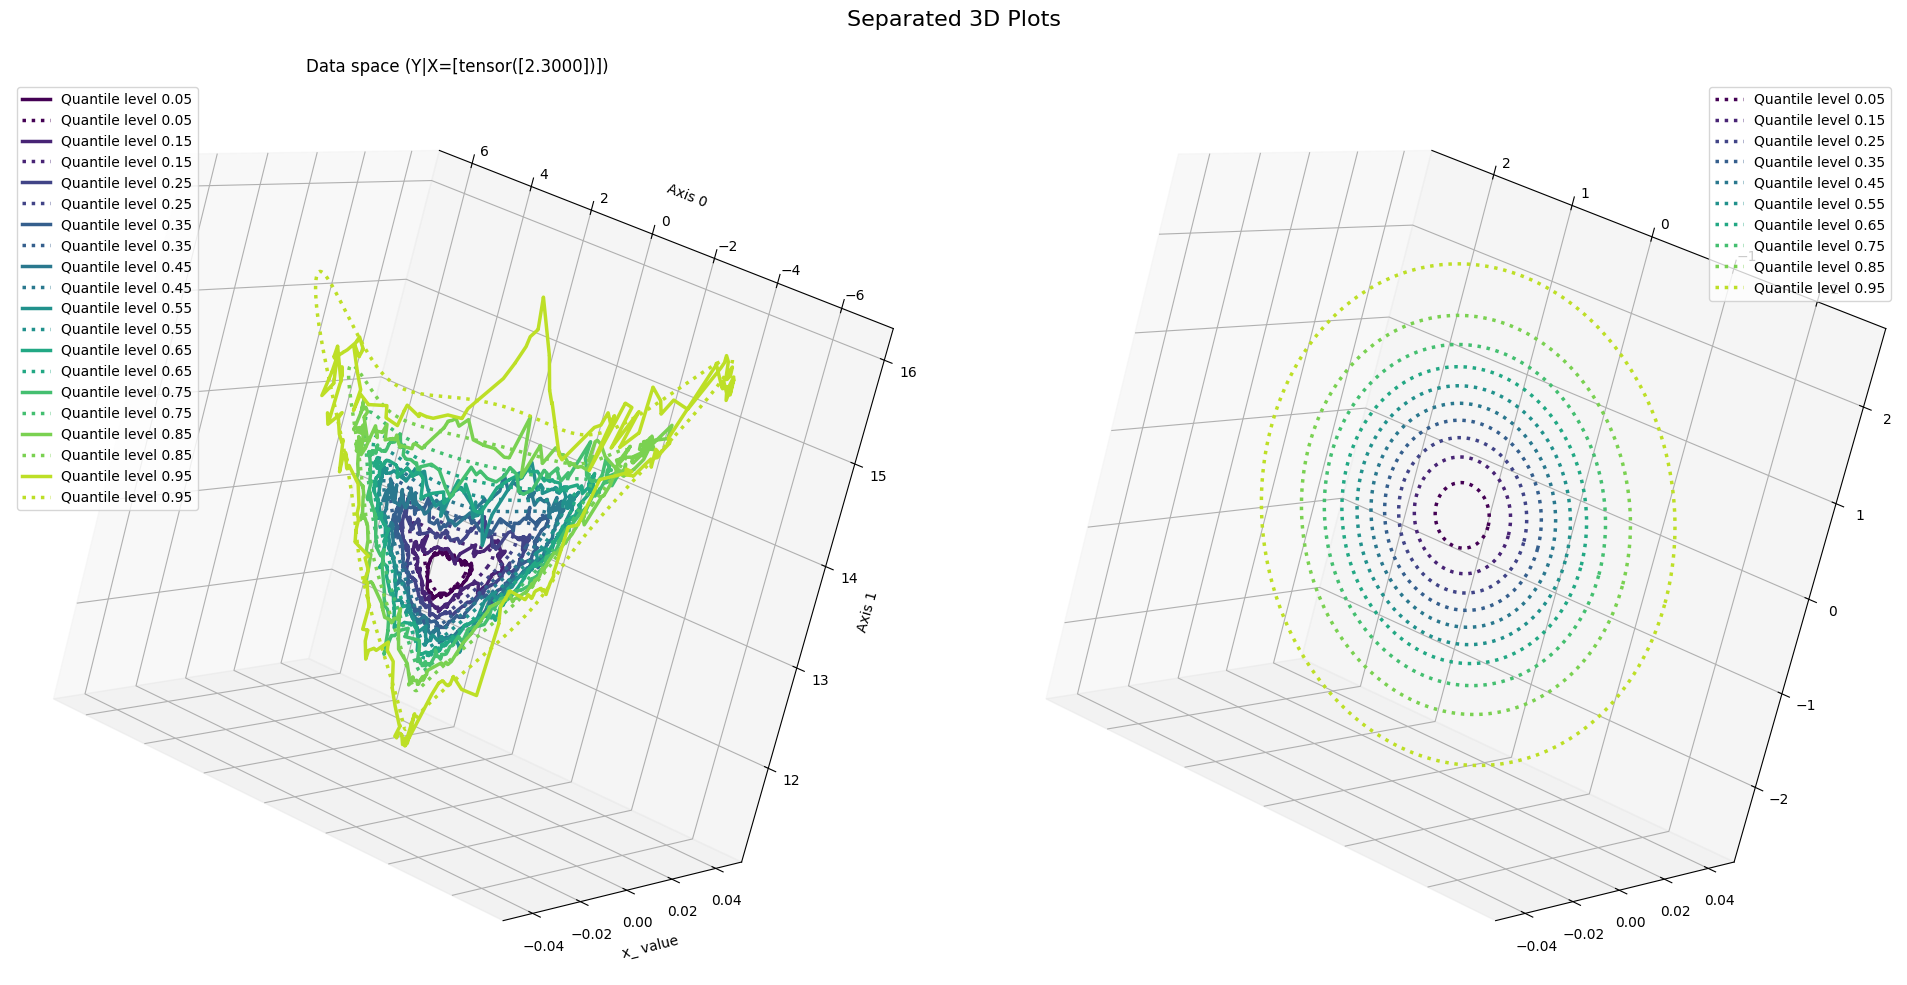

In [7]:
from utils.plot import plot_quantile_levels_from_dataset
from datasets import ConvexBananaDataset

dataset = ConvexBananaDataset(tensor_parameters=experiment.tensor_parameters)
plot_quantile_levels_from_dataset(
    model=model,
    dataset=dataset,
    conditional_value=torch.Tensor([[2.3]]),
    number_of_quantile_levels=10,
    tensor_parameters=experiment.tensor_parameters
)